In [61]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import mpld3
mpld3.enable_notebook()

In [47]:
import pandas as pd
import numpy as np
import random
import xgboost as xgb
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score, auc,roc_curve
import pandas_profiling 
from scipy import stats



In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
pandas_profiling.ProfileReport(train)

Number of variables,22
Number of observations,69713
Total Missing (%),8.8%
Total size in memory,11.7 MiB
Average record size in memory,176.0 B
Numeric,8
Categorical,12
Date,0
Text (Unique),1
Rejected,1
Distinct count,2


In [6]:
pandas_profiling.ProfileReport(test)

Number of variables,21
Number of observations,30037
Total Missing (%),9.2%
Total size in memory,4.8 MiB
Average record size in memory,168.0 B
Numeric,7
Categorical,12
Date,0
Text (Unique),1
Rejected,1
Distinct count,4


# Univariate Analysis

## Bar charts of categorical data (Univariate Analysis)

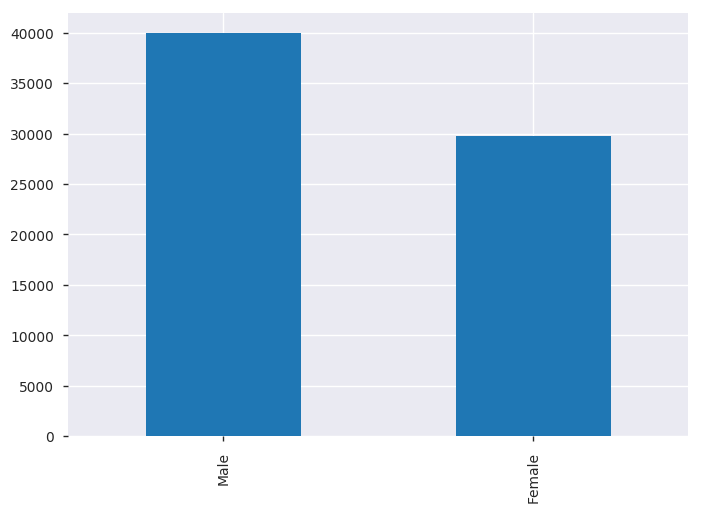

In [18]:
train['Gender'].value_counts().head(100).plot.bar() #For top 100

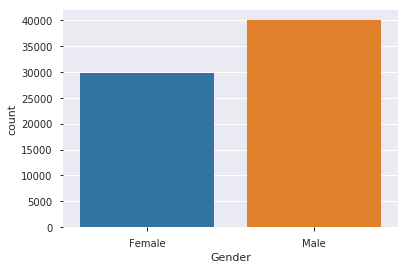

In [88]:
#pandas bar plot = seaborn count plot
sns.countplot(train['Gender'])

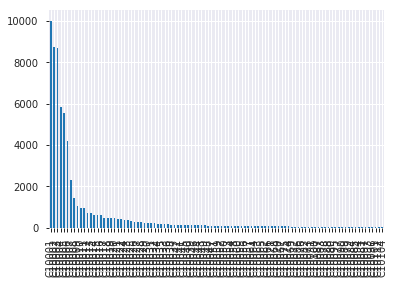

In [22]:
train['City_Code'].value_counts().head(100).plot.bar() #For top 100

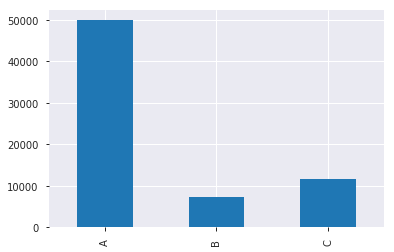

In [36]:
train['City_Category'].value_counts().sort_index().head(100).plot.bar() #For top 100

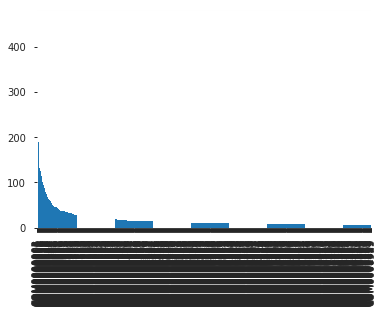

In [25]:
train['Employer_Code'].value_counts().head(1000).plot.bar() #For top 100

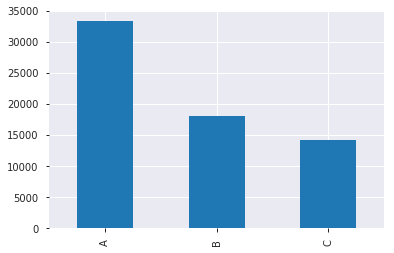

In [35]:
train['Employer_Category1'].value_counts().sort_index().head(1000).plot.bar() #For top 100

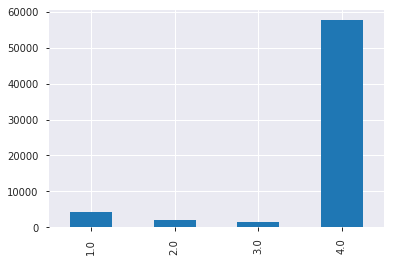

In [34]:
train['Employer_Category2'].value_counts().sort_index().head(1000).plot.bar() #For top 100

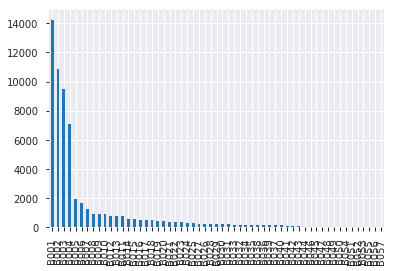

In [28]:
train['Customer_Existing_Primary_Bank_Code'].value_counts().head(1000).plot.bar() #For top 100

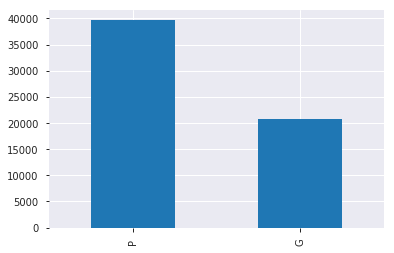

In [29]:
train['Primary_Bank_Type'].value_counts().head(1000).plot.bar() #For top 100

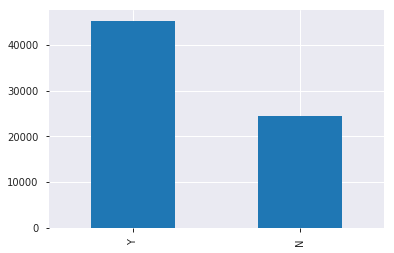

In [30]:
train['Contacted'].value_counts().head(1000).plot.bar() #For top 100

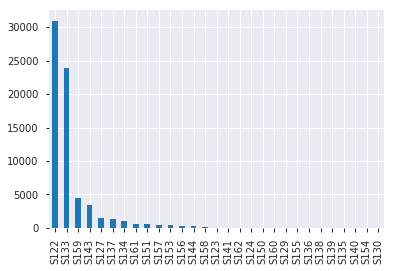

In [31]:
train['Source'].value_counts().head(1000).plot.bar() #For top 100

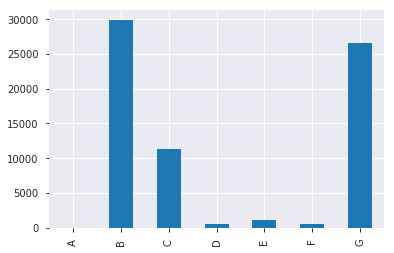

In [33]:
train['Source_Category'].value_counts().sort_index().head(1000).plot.bar() #For top 100

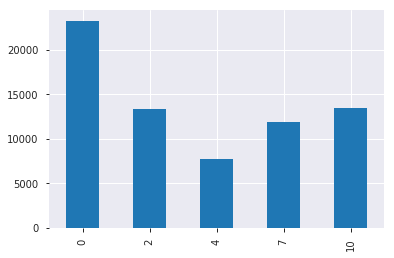

In [38]:
train['Var1'].value_counts().sort_index().head(1000).plot.bar()

## Line charts of numeric data (Univariate Analysis)

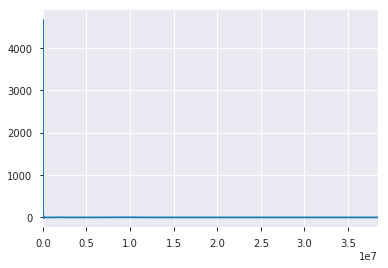

In [39]:
train['Monthly_Income'].value_counts().sort_index().plot.line()

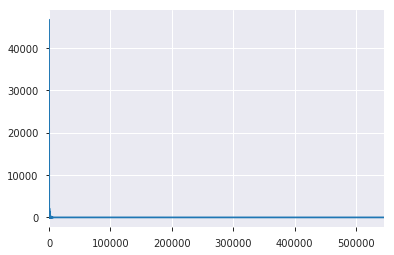

In [40]:
train['Existing_EMI'].value_counts().sort_index().plot.line()

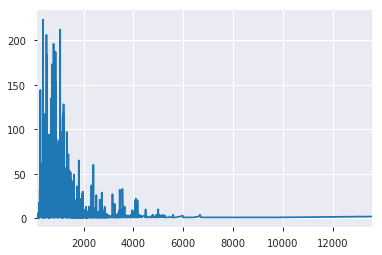

In [46]:
train['EMI'].value_counts().sort_index().plot.line()

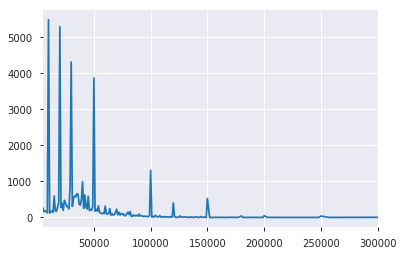

In [42]:
train['Loan_Amount'].value_counts().sort_index().plot.line()

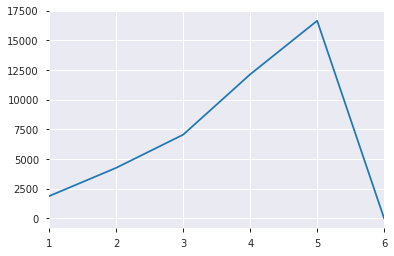

In [44]:
train['Loan_Period'].value_counts().sort_index().plot.line()

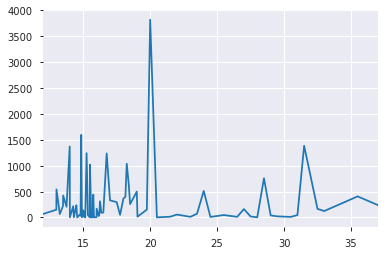

In [45]:
train['Interest_Rate'].value_counts().sort_index().plot.line()

In [ ]:
#Point To Remember : Area charts are line charts with bottom area shaded
#train['Interest_Rate'].value_counts().sort_index().plot.area()

## Kernel Density Estimate Plot (Univariate Analysis)

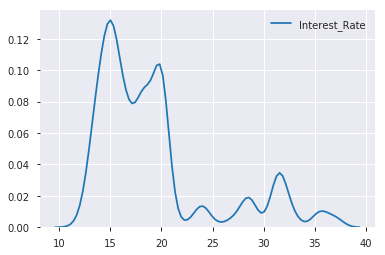

In [90]:
#Source: https://www.kaggle.com/residentmario/plotting-with-seaborn
'''
KDE, short for "kernel density estimate", is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.

For example, suppose that there was just one wine priced 19.93$, but several hundred prices 20.00$. If we were to plot the value counts in a line chart, our line would dip very suddenly down to 1 and then back up to around 1000 again, creating a strangely "jagged" line. The line chart with the same data, shown below for the purposes of comparison, has exactly this problem!
'''
sns.kdeplot(train['Interest_Rate'].dropna())


## Histogram (Univariate Analysis) - For Numeric Data

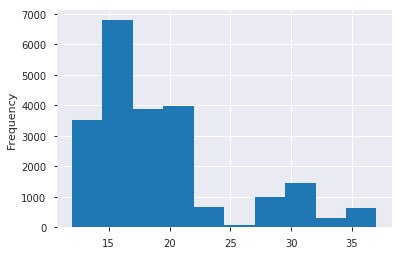

In [51]:
#For Numeric
train['Interest_Rate'].plot.hist()


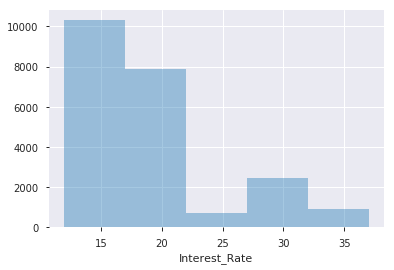

In [95]:
#"seaborn distplot" same as "pandas hist"
#bins = number of bins mention to make a clearer plot
#kde i.e smooting by default is True, make it False explicitly
sns.distplot(train['Interest_Rate'].dropna(), bins=5, kde=False)

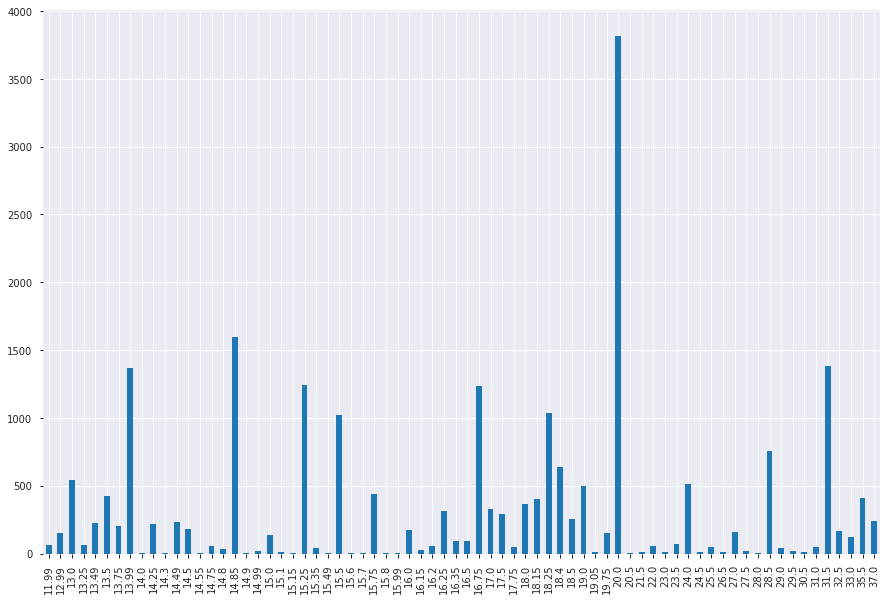

In [79]:
train['Interest_Rate'].value_counts().sort_index().plot.bar(figsize=(15, 10))

## Pie Charts (Univariate Analysis)

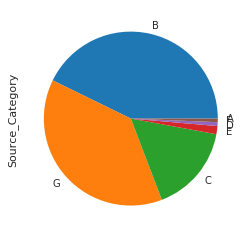

In [55]:
train['Source_Category'].value_counts().head(10).plot.pie()
plt.gca().set_aspect('equal')

TypeError: cannot perform reduce with flexible type

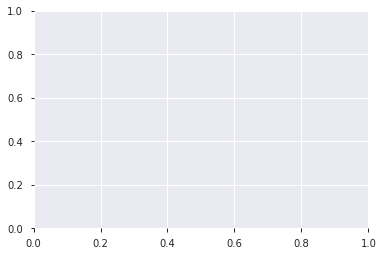

In [102]:
sns.boxplot(x='Source_Category', y='Loan_Amount',data=train)

# Bivariate Analysis

## Scatter plot (Bivariate Analysis)

TypeError: array([ 0.3]) is not JSON serializable

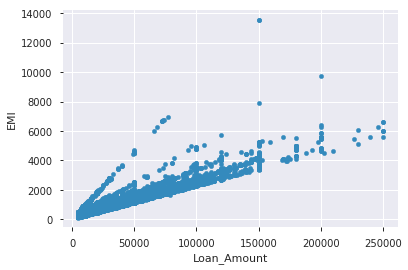

In [62]:
train.plot.scatter(x='Loan_Amount', y='EMI')

## Kernel Density Estimate plot (Bivariate Analysis)

TypeError: array([ 1.75]) is not JSON serializable

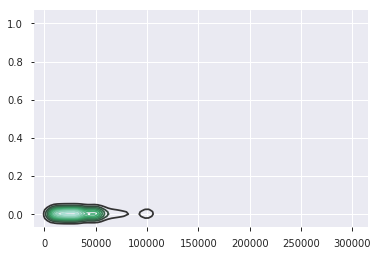

In [92]:
sns.kdeplot(train[['Loan_Amount','Approved']].dropna())

## Hexplot (A hexplot aggregates points in space into hexagons, and then colorize those hexagons) (Bivariate Analysis)

TypeError: array([ 1.]) is not JSON serializable

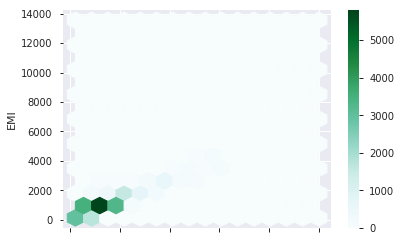

In [63]:
train.plot.hexbin(x='Loan_Amount', y='EMI', gridsize=15)

## JointPlot - combine scatter and hexplot (Bivariate Analysis)

TypeError: array([ 0.3]) is not JSON serializable

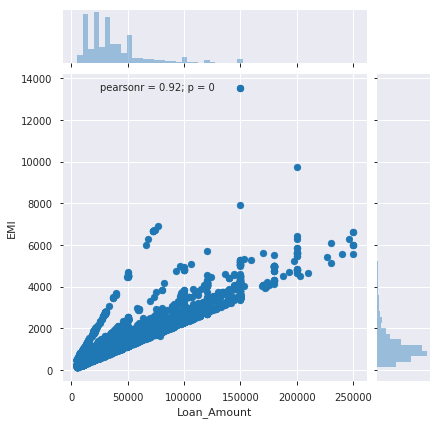

In [97]:
sns.jointplot(x='Loan_Amount', y='EMI', data=train[['Loan_Amount', 'EMI']].dropna())

TypeError: array([ 1.]) is not JSON serializable

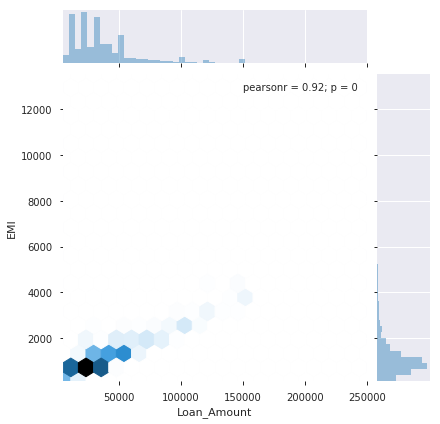

In [99]:
sns.jointplot(x='Loan_Amount', y='EMI', data=train[['Loan_Amount', 'EMI']].dropna(), kind='hex', gridsize=20)

## Stacked Plots (Bivariate Analysis)

In [65]:
 train_stats_as_per_source_category = train.groupby('Source_Category').mean()[['Loan_Amount', 'Existing_EMI', 'EMI']]

In [68]:
train_stats_as_per_source_category.head()

,Loan_Amount,Existing_EMI,EMI
Source_Category,,,
A,16500.000000,70.000000,848.000000
B,33986.532361,540.207652,927.607344
C,51448.958453,0.877440,1363.924179
D,69926.229508,0.000000,1851.180328
E,33110.248447,646.162381,909.305136


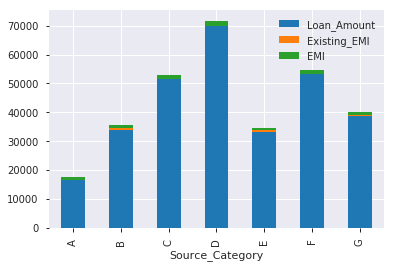

In [69]:
train_stats_as_per_source_category.plot.bar(stacked=True)
#Link https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas/

TypeError: array([ 0.3]) is not JSON serializable

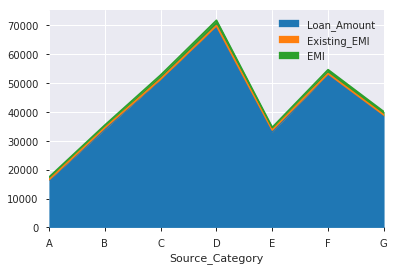

In [70]:
train_stats_as_per_source_category.plot.area()

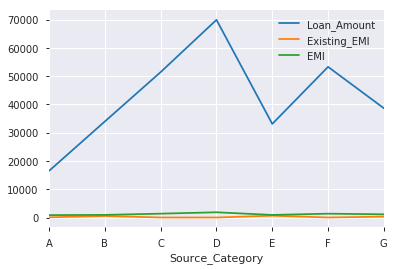

In [71]:
train_stats_as_per_source_category.plot.line()

## Box Plot (Bivariate Analysis)

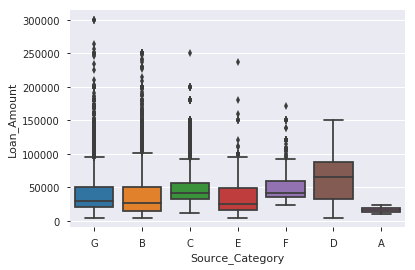

In [103]:
sns.boxplot(x='Source_Category', y='Loan_Amount',data=train)

## Violin Plot (Bivariate Analysis)

TypeError: array([ 1.75]) is not JSON serializable

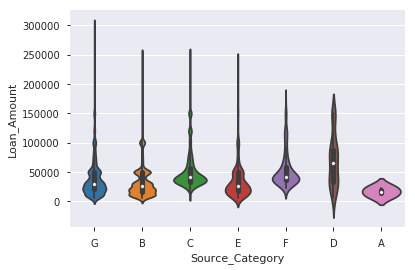

In [104]:
sns.violinplot(x='Source_Category', y='Loan_Amount',data=train)

# Multivariate Plots

## Pairplot (Multivariate plots)

TypeError: array([ 0.3]) is not JSON serializable

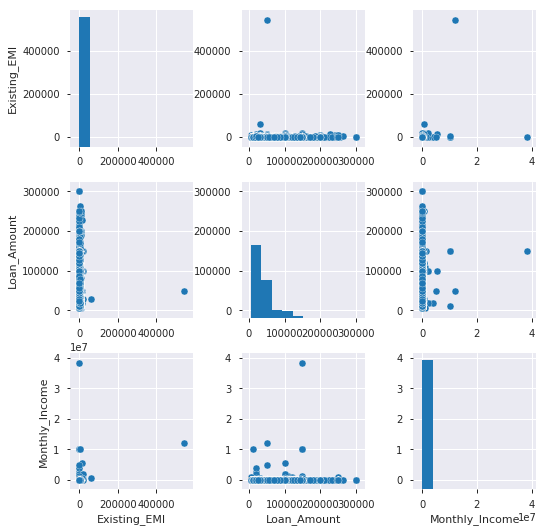

In [106]:
sns.pairplot(train[['Existing_EMI', 'Loan_Amount', 'Monthly_Income']].dropna())

## Facet Grid (Multivariate plots)

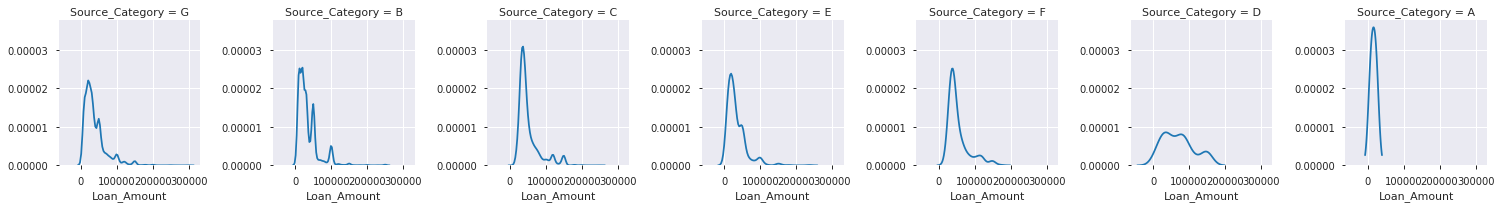

In [109]:
#A FacetGrid is an object which stores some information on how you want to break up your data visualization.
g = sns.FacetGrid(train, col="Source_Category")
g.map(sns.kdeplot, "Loan_Amount")

# Sub Plots (Multivariate plots)

In [ ]:
#fig, axarr = plt.subplots(<number_of_rows>, <number_of_columns>, figsize=(<along_x_axis>, <along_y_axis>))
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

# Scatter Plots (Multivariate plots)

TypeError: array([ 0.]) is not JSON serializable

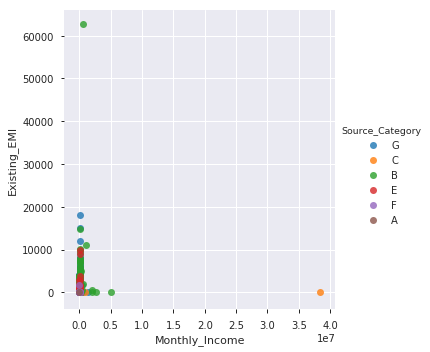

In [110]:
sns.lmplot(x='Monthly_Income', y='Existing_EMI', hue='Source_Category', data=train.dropna(), fit_reg=False)
           

## Heat Map (Multivariate Plots)

TypeError: array([0]) is not JSON serializable

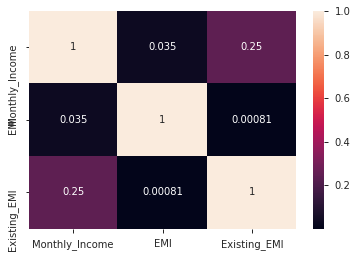

In [111]:
sns.heatmap(train[['Monthly_Income', 'EMI', 'Existing_EMI']].corr(),annot=True)

# Styling Plots (Changing Parameters)

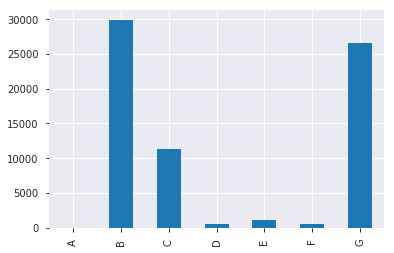

In [72]:
#Ordering values along x-aixs as per index
train['Source_Category'].value_counts().sort_index().plot.bar()

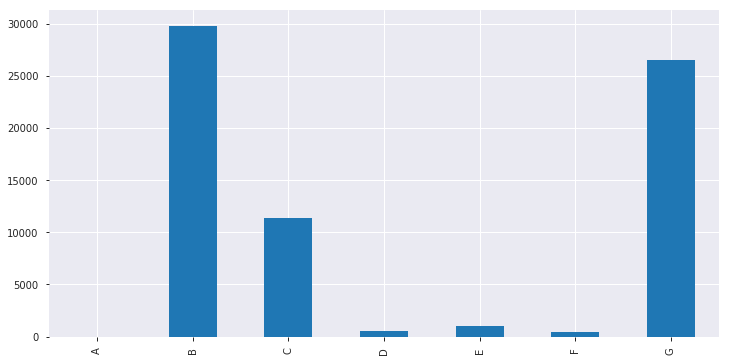

In [73]:
#Controlling x-axis and y-axis size using figsize
train['Source_Category'].value_counts().sort_index().plot.bar(figsize=(12, 6))

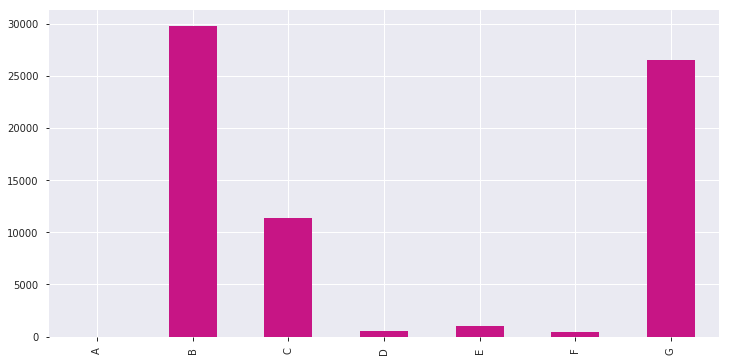

In [80]:
#Adding color
train['Source_Category'].value_counts().sort_index().plot.bar(figsize=(12, 6),color='mediumvioletred')

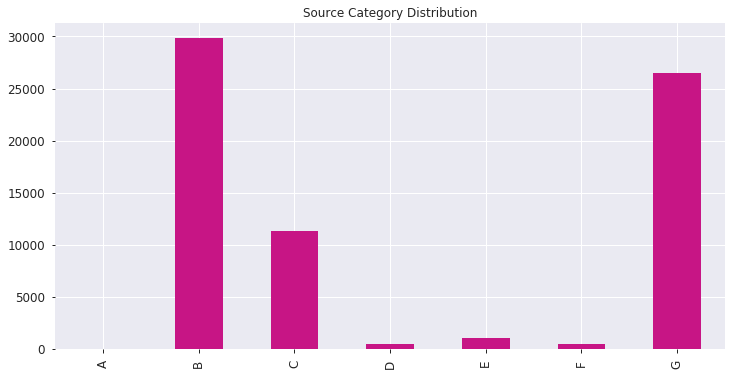

In [82]:
#Adding font size and title
train['Source_Category'].value_counts().sort_index().plot.bar(figsize=(12, 6),color='mediumvioletred', fontsize=12, title='Source Category Distribution')

Text(0.5,1,'Source Category Distribution')

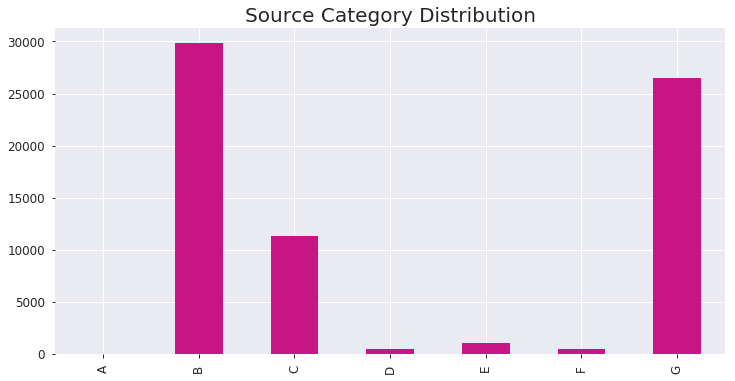

In [84]:
#Adding Title in bigger font
ax = train['Source_Category'].value_counts().sort_index().plot.bar(figsize=(12, 6),color='mediumvioletred', fontsize=12)
ax.set_title("Source Category Distribution", fontsize=20)

# Extra Topic

## Plotnine

In [ ]:
#Link: https://www.kaggle.com/residentmario/grammer-of-graphics-with-plotnine-optional/
df = top_wines.head(1000).dropna()

(ggplot(df)
     + aes('points', 'price')
     + aes(color='points')
     + geom_point()
     + stat_smooth()
     + facet_wrap('~variety')
)

## Plotly

In [115]:
#Source: https://www.kaggle.com/residentmario/introduction-to-plotly-optional/
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

df = train.assign(n=0).groupby(['Primary_Bank_Type', 'Source_Category'])['n'].count().reset_index()
v = df.pivot(index='Primary_Bank_Type', columns='Source_Category', values='n').fillna(0).values.tolist()
iplot([go.Surface(z=v)])